# Variances for velocity and entropy production for different models
## Fig. 6 and Fig. 8 in the paper

To investigate whether the coarse-grained model approximates
the original model well also in the presence of a load force,
we plot the differences in the velocity and the entropy production between various coarse-grained models and the original model as functions of the force in Fig. 6 (the corresponding
variances are shown in the Appendix).
Both figures indicate that unicyclic models approximate
the original model well for zero or small external load forces.
For increasing forces, the approximation of the velocity and
the entropy production distribution becomes less accurate.
The next subsection shows that changing the force parameter
results in a different hierarchy of models at different levels of coarse graining.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

import time
import random
import networkx as nx
import os

import sys
path='Bibliotheken/'
res2 = os.listdir(path)
print(res2)
sys.path.append(path)

import Steady_State_Calculation_Spanning_Trees as auto
import Kinesin_Parameters as Kinesin
import PDF_Flux_entropy as PDF
#import Analytic_Quantities as analytic

#import Bib3_CountCycles as CountCycles

['Steady_State_Calculation_Spanning_Trees.py', 'Kinesin_Parameters.py', 'Analytic_Quantities.py', 'PDF_Flux_entropy.py', 'Bib3_version4b.py', '__pycache__']


In [2]:
def CG_4statemodel_3cycles_symm_mapping(w,p):
    # coarse graining 
    # I start counting from 0
    # first merge 0 and 5

    # wsliced is the original matrix with steady state p
    wcg1=np.zeros((5,5))
    #copying
    for i in range(5):
        for j in range(5):
            wcg1[i][j]=w[i][j]
    # new rates
    wcg1[0][1]=w[0][1]*p[0]/(p[0]+p[5])
    wcg1[0][4]=w[5][4]*p[5]/(p[0]+p[5])
    wcg1[4][0]=w[4][5]
    print(wcg1)
    Gcg1=auto.Matrix2Graph(wcg1)
    pcg1=auto.steady_state(Gcg1)
    # merge states 3 and 4 in the paper notation
    # merge 2 and 3 in notation starting with 0
    #copying
    wcg2=wcg1
    #new rates
    wcg2[4][2]=wcg1[4][3]
    wcg2[2][1]=wcg1[2][1]*pcg1[2]/(pcg1[2]+pcg1[3])
    wcg2[2][4]=wcg1[3][4]*pcg1[3]/(pcg1[2]+pcg1[3])
    wcg2=np.delete(wcg2, 3, 0)
    wcg2= np.delete(wcg2, 3, 1)
    
    Gcg2=auto.Matrix2Graph(wcg2)
    pcg2=auto.steady_state(Gcg2)
    print(wcg2)
    Gcg2=auto.Matrix2Graph(wcg2)
    pcg2=auto.steady_state(Gcg2)
    print()
    print('4 state model tri-cyclic')
    print('probabilites')
    print(p)
    print('merge states 1 and 6')
    print(pcg1)
    print('merge states 3 and 4')
    print(pcg2)
    
    return wcg2, pcg2

def CG_4statemodel_unicyclic(w,p):
    #merge state 3 and 4
    i=1
    #copying
    wcg1=w
    #print(w_copy)
    #sclicing: delete 4 th row (dim=0)
    #numpy.delete(arr, obj, axis=None)
    wcg1=  np.delete(wcg1, 4-1, 0)
    #print(wcg1)
    wcg1=np.delete(wcg1, 4-1, 1) #delete 4 th column (dim=1)
    #print(wcg1)
    # new rates
    wcg1[3-i][2-i]=w[3-i][2-i]*p[3-i]/(p[3-i]+p[4-i])
    wcg1[3-i][4-i]=w[4-i][5-i]*p[4-i]/(p[3-i]+p[4-i])
    wcg1[4-i][3-i]=w[5-i][4-i]
    print()
    #print(wcg1)
    Gcg1=auto.Matrix2Graph(wcg1)
    pcg1=auto.steady_state(Gcg1)
    
    #merge states 2' and 3' in the 5-state model
    wcg2=wcg1
    #print(wcg2)
    #sclicing: delete 3-1 th row (dim=0)
    #numpy.delete(arr, obj, axis=None)
    wcg2=  np.delete(wcg2, 3-1, 0)
    #print(wcg2)
    wcg2=np.delete(wcg2, 3-1, 1) #delete 3+1 th column (dim=1)
    #print(wcg2)
    # new rates
    wcg2[2-i][3-i]=(wcg1[2-i][4-i]*pcg1[2-i]+wcg1[3-i][4-i]*pcg1[3-i])/(pcg1[2-i]+pcg1[3-i])
    wcg2[2-i][1-i]=wcg1[2-i][1-i]*pcg1[2-i]/(pcg1[2-i]+pcg1[3-i])
    wcg2[3-i][2-i]=wcg1[4-i][2-i]+wcg1[4-i][3-i]
    print()
    #print(wcg2)
    Gcg2=auto.Matrix2Graph(wcg2)
    pcg2=auto.steady_state(Gcg2)
    
    print('pcg2 (states 2 and 3 merged), pcg1 (states 3 and 4 merged), p')
    print(pcg2)
    print(pcg1)
    print(p)
    return wcg2, pcg2


def CG_3statemodel(wcg2, pcg2):
    #merge states 4 and 1
    i=1
    #copying
    wcg3=wcg2
    #print(wcg3)
    #sclicing: delete 4-1 th row (dim=0)
    #numpy.delete(arr, obj, axis=None)
    wcg3=  np.delete(wcg3, 4-1, 0)
    #print(wcg3)
    wcg3=np.delete(wcg3, 4-1, 1) #delete 4-1 th column (dim=1)
    #print(wcg3)
    # new rates
    wcg3[1-i][2-i]=(wcg2[1-i][2-i]*pcg2[1-i])/(pcg2[1-i]+pcg2[4-i])
    wcg3[1-i][3-i]=(wcg2[4-i][3-i]*pcg2[4-i])/(pcg2[1-i]+pcg2[4-i])
    wcg3[3-i][1-i]=wcg2[3-i][4-i]

    print()
    #print(wcg3)
    Gcg3=auto.Matrix2Graph(wcg3)
    pcg3=auto.steady_state(Gcg3)
    print('pcg3, pcg2: merge states 1 and 4')
    print(pcg3)
    print(pcg2)
    return wcg3, pcg3

### unicyclic backward

In [3]:
def CG_uni_backward_cycle(w,p):
    i=1
    #merge states 1 and 2
    wcg1=w
    #print(wcg1)
    #sclicing: delete 1-1 th row (dim=0)
    #numpy.delete(arr, obj, axis=None)
    wcg1=  np.delete(wcg1, 1-1, 0)
    #print(wcg1)
    wcg1=np.delete(wcg1, 1-1, 1) #delete 3+1 th column (dim=1)
    #print(wcg1)
    # new rates
    wcg1[1-i][5-i]=w[1-i][6-i]*p[1-i]/(p[1-i]+p[2-i])
    wcg1[1-i][4-i]=w[2-i][5-i]*p[2-i]/(p[1-i]+p[2-i])
    wcg1[1-i][2-i]=w[2-i][3-i]*p[2-i]/(p[1-i]+p[2-i])
    wcg1[5-i][1-i]=w[6-i][1-i]
    print()
    #print(wcg1)
    Gcg1=auto.Matrix2Graph(wcg1)
    pcg1=auto.steady_state(Gcg1)

    #merge 5-1
    wcg2=wcg1
    #print(wcg2)
    #sclicing: delete 5-1 th row (dim=0)
    wcg2=  np.delete(wcg2, 5-1, 0)
    wcg2=np.delete(wcg2, 5-1, 1) #delete 3+1 th column (dim=1)
    # new rates
    wcg2[1-i][2-i]=(wcg1[1-i][2-i]*pcg1[1-i])/(pcg1[1-i]+pcg1[5-i])
    wcg2[1-i][4-i]=(wcg1[1-i][4-i]*pcg1[1-i]+wcg1[5-i][4-i]*pcg1[5-i])/(pcg1[1-i]+pcg1[5-i])
    wcg2[4-i][1-i]=wcg1[4-i][1-i]+wcg1[4-i][5-i]
    Gcg2=auto.Matrix2Graph(wcg2)
    pcg2=auto.steady_state(Gcg2)
    return wcg2, pcg2

In [4]:
# Test
[w, w1]=Kinesin.Kinesin(force=0)
#calculate steady-state
G=auto.Matrix2Graph(w)
p=auto.steady_state(G)
print(p)

w4state3cycle, p4state3cycle = CG_4statemodel_3cycles_symm_mapping(w,p)
w4state1cycle, p4state1cycle = CG_4statemodel_unicyclic(w,p)
w3state1cycle, p3state1cycle = CG_3statemodel(w4state1cycle, p4state1cycle)

wcg_back, pcg_back = CG_uni_backward_cycle(w,p)
print(pcg_back)

[9.81569409e-01 5.89059580e-06 5.95333810e-06 6.54212978e-04
 8.83519759e-03 8.92933633e-03]
[[0.00000000e+00 1.78377302e+00 0.00000000e+00 0.00000000e+00
  8.11349104e-04]
 [1.00000000e+02 0.00000000e+00 2.00000000e+02 0.00000000e+00
  3.00000000e+05]
 [0.00000000e+00 9.00000000e-02 0.00000000e+00 2.00000000e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.00000000e-02 0.00000000e+00
  1.80000000e+00]
 [2.00000000e+02 2.40000000e-01 0.00000000e+00 6.40000000e-11
  0.00000000e+00]]
[[0.00000000e+00 1.78377302e+00 0.00000000e+00 8.11349104e-04]
 [1.00000000e+02 0.00000000e+00 2.00000000e+02 3.00000000e+05]
 [0.00000000e+00 8.11614309e-04 0.00000000e+00 1.78376771e+00]
 [2.00000000e+02 2.40000000e-01 6.40000000e-11 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[9.81569409e-01 5.89059580e-06 5.95333810e-06 6.54212978e-04
 8.83519759e-03 8.92933633e-03]
merge states 1 and 6
[9.90498746e-01 5.89059580e-06 5.95333810e-06 6.54212978e-04
 8.83519759e-03]
merge states 3 and 4
[

# Analytic quantities

In [5]:
def analytic_original(w,w1, p ,time):
    G=auto.Matrix2Graph(w)
    normierung=auto.Normfactor(G)
    #print('forward cycle F')
    zuflussF=(w1[4][5]*w1[3][2]+w1[3][4]*w1[4][5]+w1[4][3]*w1[3][2])
    JF_plus=w1[1][2]*w1[2][5]*w1[5][6]*w1[6][1]*zuflussF/normierung
    JF_minus=w1[1][6]*w1[6][5]*w1[5][2]*w1[2][1]*zuflussF/normierung
    #print([JF_plus, JF_minus])
    #print(zuflussF/normierung)
    #print()

    #print('backward cycle B')
    zuflussB=(w1[1][2]*w1[6][5]+w1[6][1]*w1[1][2]+w1[1][6]*w1[6][5])
    JB_plus=w1[2][3]*w1[3][4]*w1[4][5]*w1[5][2]*zuflussB/normierung
    JB_minus=w1[2][5]*w1[5][4]*w1[4][3]*w1[3][2]*zuflussB/normierung
    #print([JB_plus, JB_minus])
    #print(zuflussB/normierung)
    #print()

    #print('dissipative cycle D')
    zuflussD=1.0
    JD_plus=w1[1][2]*w1[2][3]*w1[3][4]*w1[4][5]*w1[5][6]*w1[6][1]*zuflussD/normierung
    JD_minus=w1[1][6]*w1[6][5]*w1[5][4]*w1[4][3]*w1[3][2]*w1[2][1]*zuflussD/normierung
    #print([JD_plus, JD_minus])
    #print(zuflussD/normierung)
    #print()

    #print('mean and variance for 1200 s')
    #print(JF_plus-JF_minus-JB_plus+JB_minus)
    #print((JF_plus+JF_minus+JB_plus+JB_minus)/12e2)

    #Entropyproduction
    J12=w1[1][2]*p[1-1]-w1[2][1]*p[2-1]
    J23=w1[2][3]*p[2-1]-w1[3][2]*p[3-1]
    DeltaS_F=np.log(w1[1][2]*w1[2][5]*w1[5][6]*w1[6][1])-np.log(w1[1][6]*w1[6][5]*w1[5][2]*w1[2][1])
    DeltaS_B=np.log(w1[2][3]*w1[3][4]*w1[4][5]*w1[5][2])-np.log(w1[2][5]*w1[5][4]*w1[4][3]*w1[3][2])
    P=J12*DeltaS_F+J23*DeltaS_B
    #print(P)
    
    
    #Varianz Entropieproduktion
    J12=w1[1][2]*p[1-1]-w1[2][1]*p[2-1]
    J23=w1[2][3]*p[2-1]-w1[3][2]*p[3-1]
    DeltaS_F=np.log(w1[1][2]*w1[2][5]*w1[5][6]*w1[6][1])-np.log(w1[1][6]*w1[6][5]*w1[5][2]*w1[2][1])
    DeltaS_B=np.log(w1[2][3]*w1[3][4]*w1[4][5]*w1[5][2])-np.log(w1[2][5]*w1[5][4]*w1[4][3]*w1[3][2])
    #print('Affinities')
    #print([DeltaS_F, DeltaS_B])
    P_mean=J12*DeltaS_F+J23*DeltaS_B
    #print(P_mean)
    term1=(JF_plus+JF_minus+JD_plus+JD_minus)*(DeltaS_F/time)*(DeltaS_F)
    term2=(JB_plus+JB_minus+JD_plus+JD_minus)*(DeltaS_B/time)*(DeltaS_B)
    P_var=term1+term2
    #print(P_var)


    #Geschwindikgeit 
    #print('mean and variance of velocity')
    # indices mit null startend
    velo=w[1][4]*p[1]-w[4][1]*p[4]
    #print(velo)
    var_velo=(JF_plus+JF_minus+JB_plus+JB_minus)/time
    #print(var_velo)
    #calculate velocity variance with transition fluxes
    var_transition=(w[1][4]*p[1]+w[4][1]*p[4])/time
    #print(var_transition)
    #print('Difference between variances calculated with cycles and transition fluxes')
    #print(var_velo-var_transition)
    return P_mean, P_var, velo, var_velo


def analytic_4statemodel_3cycles_symm_mapping(wcg2, pcg2 ,time):
    Gcg2=auto.Matrix2Graph(wcg2)
    # Analytisch coarse grained 4 state model
    #print(' ')
    #print('Coarse-grained')
    CGnormierung=auto.Normfactor(Gcg2)
    #print('forward cycle F')
    CGzuflussF=(wcg2[2][3]+wcg2[2][1])
    CGJF_plus=wcg2[0][1]*wcg2[1][3]*wcg2[3][0]*CGzuflussF/CGnormierung
    CGJF_minus=wcg2[1][0]*wcg2[0][3]*wcg2[3][1]*CGzuflussF/CGnormierung
    #print([CGJF_plus, CGJF_minus])
    #print(CGzuflussF/CGnormierung)
    #print()

    #print('backward cycle F')
    CGzuflussB=(wcg2[0][1]+wcg2[0][3])
    CGJB_plus=wcg2[1][2]*wcg2[2][3]*wcg2[3][1]*CGzuflussB/CGnormierung
    CGJB_minus=wcg2[1][3]*wcg2[3][2]*wcg2[2][1]*CGzuflussB/CGnormierung
    #print([CGJB_plus, CGJB_minus])
    #print(CGzuflussB/CGnormierung)
    #print()

    #print('dissipative cycle D')
    CGzuflussD=1.0
    CGJD_plus=wcg2[0][1]*wcg2[1][2]*wcg2[2][3]*wcg2[3][0]*CGzuflussD/CGnormierung
    CGJD_minus=wcg2[0][3]*wcg2[3][2]*wcg2[2][1]*wcg2[1][0]*CGzuflussD/CGnormierung
    #print([CGJD_plus, CGJD_minus])
    #print(CGzuflussD/CGnormierung)
    #print()

    #Variance entropy production coarse grained
    CGJ12=wcg2[1-1][2-1]*pcg2[1-1]-wcg2[2-1][1-1]*pcg2[2-1]
    CGJ23=wcg2[2-1][3-1]*pcg2[2-1]-wcg2[3-1][2-1]*pcg2[3-1]
    DeltaS_F=np.log(wcg2[0][1]*wcg2[1][3]*wcg2[3][0])-np.log(wcg2[0][3]*wcg2[3][1]*wcg2[1][0])
    DeltaS_B=np.log(wcg2[1][2]*wcg2[2][3]*wcg2[3][1])-np.log(wcg2[1][3]*wcg2[3][2]*wcg2[2][1])
    #print([DeltaS_F, DeltaS_B])
    #print('Affinities')
    #print([DeltaS_F, DeltaS_B])
    P_mean_cg=CGJ12*DeltaS_F+CGJ23*DeltaS_B
    #print(P_mean_cg)
    term1=(CGJF_plus+CGJF_minus+CGJD_plus+CGJD_minus)*(DeltaS_F/time)*(DeltaS_F)
    term2=(CGJB_plus+CGJB_minus+CGJD_plus+CGJD_minus)*(DeltaS_B/time)*(DeltaS_B)
    P_var_cg=term1+term2
    #print(P_var_cg)

    #Velocity coarse-grained 
    #print('mean and variance of velocity')
    velo_cg=wcg2[1][3]*pcg2[1]-wcg2[3][1]*pcg2[3]
    #print(velo_cg)
    var_velo_cg=(CGJF_plus+CGJF_minus+CGJB_plus+CGJB_minus)/time
    #print(var_velo_cg)
    return P_mean_cg, P_var_cg, velo_cg, var_velo_cg

def analytic_4statemodel_unicyclic(w, p ,time):
    i=1
    G=auto.Matrix2Graph(w)
    Normierung=auto.Normfactor(G)
    transition_flux=w[2-i][3-i]*p[2-i]-w[3-i][2-i]*p[3-i]
    cycle_flux1=w[1-i][2-i]*w[2-i][3-i]*w[3-i][4-i]*w[4-i][1-i]/Normierung
    cycle_flux2=w[2-i][1-i]*w[1-i][4-i]*w[4-i][3-i]*w[3-i][2-i]/Normierung
    velo_mean=transition_flux
    velo_var=(cycle_flux1+cycle_flux2)/time
    Affinity_cycle=np.log(w[1-i][2-i]*w[2-i][3-i]*w[3-i][4-i]*w[4-i][1-i])-np.log(w[2-i][1-i]*w[1-i][4-i]*w[4-i][3-i]*w[3-i][2-i])
    P_mean=Affinity_cycle*transition_flux
    P_var=Affinity_cycle*Affinity_cycle/time*( cycle_flux1 + cycle_flux2)
    return P_mean, P_var, velo_mean, velo_var

def analytic_3statemodel_unicyclic(w, p ,time):
    i=1
    G=auto.Matrix2Graph(w)
    Normierung=auto.Normfactor(G)
    transition_flux=w[2-i][3-i]*p[2-i]-w[3-i][2-i]*p[3-i]
    cycle_flux1=w[1-i][2-i]*w[2-i][3-i]*w[3-i][1-i]/Normierung
    cycle_flux2=w[2-i][1-i]*w[1-i][3-i]*w[3-i][2-i]/Normierung
    velo_mean=transition_flux
    velo_var=(cycle_flux1+cycle_flux2)/time
    Affinity_cycle=np.log(w[1-i][2-i]*w[2-i][3-i]*w[3-i][1-i])-np.log(w[2-i][1-i]*w[1-i][3-i]*w[3-i][2-i])
    P_mean=Affinity_cycle*transition_flux
    P_var=Affinity_cycle*Affinity_cycle/time*( cycle_flux1 + cycle_flux2)
    return P_mean, P_var, velo_mean, velo_var

def analytic_4statemodel_BACKWARD_CYCLE(w, p ,time):
    i=1
    G=auto.Matrix2Graph(w)
    Normierung=auto.Normfactor(G)
    transition_flux=w[1-i][4-i]*p[1-i]-w[4-i][1-i]*p[4-i]  # corresponds to forward step
    cycle_flux1=w[1-i][2-i]*w[2-i][3-i]*w[3-i][4-i]*w[4-i][1-i]/Normierung
    cycle_flux2=w[2-i][1-i]*w[1-i][4-i]*w[4-i][3-i]*w[3-i][2-i]/Normierung
    velo_mean=transition_flux
    velo_var=(cycle_flux1+cycle_flux2)/time
    Affinity_cycle=np.log(w[1-i][2-i]*w[2-i][3-i]*w[3-i][4-i]*w[4-i][1-i])-np.log(w[2-i][1-i]*w[1-i][4-i]*w[4-i][3-i]*w[3-i][2-i])
    P_mean=Affinity_cycle*(w[1-i][2-i]*p[1-i]-w[2-i][1-i]*p[2-i])
    P_var=Affinity_cycle*Affinity_cycle/time*( cycle_flux1 + cycle_flux2)
    return P_mean, P_var, velo_mean, velo_var
    
    

In [6]:
print(analytic_original(w,w1, p ,time=1.))
print(analytic_4statemodel_3cycles_symm_mapping(wcg2=w4state3cycle, pcg2=p4state3cycle ,time=1.))
print(analytic_4statemodel_unicyclic(w=w4state1cycle, p=p4state1cycle ,time=1.))
print(analytic_3statemodel_unicyclic(w=w3state1cycle, p=p3state1cycle ,time=1.))
print(analytic_4statemodel_BACKWARD_CYCLE(w=wcg_back, p=pcg_back ,time=1.))

(47.610360985157904, 1282.5219022406986, 1.765058293576666, 1.7650611176792552)
(39.638389664034094, 888.9838009182348, 1.7650582935766654, 1.7650611183140419)
(47.57981595568531, 1281.7307789670776, 1.7662358769369022, 1.766235876943962)
(39.61315654765619, 888.4442858001099, 1.7662358769369024, 1.7662358775791722)
(0.039642227806101785, 1.3345180294633048, -0.0011775833602356567, 0.0011775833602359709)


In [7]:
FORCE=np.arange(0, 11e-12, 1e-13)
A_P_mean=[] 
A_P_var=[] 
A_velo_mean=[]
A_velo_var=[]

B_P_mean=[] 
B_P_var=[] 
B_velo_mean=[]
B_velo_var=[]

C_P_mean=[] 
C_P_var=[] 
C_velo_mean=[]
C_velo_var=[]

D_P_mean=[] 
D_P_var=[] 
D_velo_mean=[]
D_velo_var=[]

E_P_mean=[] 
E_P_var=[] 
E_velo_mean=[]
E_velo_var=[]

for f in FORCE:
    #Transition matrices
    [w, w1]=Kinesin.Kinesin(force=f)
    #calculate steady-state
    G=auto.Matrix2Graph(w)
    p=auto.steady_state(G)
    print(p)

    w4state3cycle, p4state3cycle = CG_4statemodel_3cycles_symm_mapping(w,p)
    w4state1cycle, p4state1cycle = CG_4statemodel_unicyclic(w,p)
    w3state1cycle, p3state1cycle = CG_3statemodel(w4state1cycle, p4state1cycle)
    
    wcg_back, pcg_back = CG_uni_backward_cycle(w,p)
    
    
    A1, A2, A3, A4 = analytic_original(w,w1, p ,time=1.)
    B1, B2, B3, B4 = analytic_4statemodel_3cycles_symm_mapping(wcg2=w4state3cycle, pcg2=p4state3cycle ,time=1.)
    C1, C2, C3, C4 = analytic_4statemodel_unicyclic(w=w4state1cycle, p=p4state1cycle ,time=1.)
    D1, D2, D3, D4 = analytic_3statemodel_unicyclic(w=w3state1cycle, p=p3state1cycle ,time=1.)
    E1, E2, E3, E4 = analytic_4statemodel_BACKWARD_CYCLE(w=wcg_back, p=pcg_back ,time=1.)
    
    A_P_mean.append(A1) 
    A_P_var.append(A2) 
    A_velo_mean.append(A3)
    A_velo_var.append(A4)

    B_P_mean.append(B1) 
    B_P_var.append(B2) 
    B_velo_mean.append(B3)
    B_velo_var.append(B4)

    C_P_mean.append(C1) 
    C_P_var.append(C2) 
    C_velo_mean.append(C3)
    C_velo_var.append(C4)

    D_P_mean.append(D1) 
    D_P_var.append(D2) 
    D_velo_mean.append(D3)
    D_velo_var.append(D4)
    
    E_P_mean.append(E1) 
    E_P_var.append(E2) 
    E_velo_mean.append(E3)
    E_velo_var.append(E4)


[9.81569409e-01 5.89059580e-06 5.95333810e-06 6.54212978e-04
 8.83519759e-03 8.92933633e-03]
[[0.00000000e+00 1.78377302e+00 0.00000000e+00 0.00000000e+00
  8.11349104e-04]
 [1.00000000e+02 0.00000000e+00 2.00000000e+02 0.00000000e+00
  3.00000000e+05]
 [0.00000000e+00 9.00000000e-02 0.00000000e+00 2.00000000e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.00000000e-02 0.00000000e+00
  1.80000000e+00]
 [2.00000000e+02 2.40000000e-01 0.00000000e+00 6.40000000e-11
  0.00000000e+00]]
[[0.00000000e+00 1.78377302e+00 0.00000000e+00 8.11349104e-04]
 [1.00000000e+02 0.00000000e+00 2.00000000e+02 3.00000000e+05]
 [0.00000000e+00 8.11614309e-04 0.00000000e+00 1.78376771e+00]
 [2.00000000e+02 2.40000000e-01 6.40000000e-11 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[9.81569409e-01 5.89059580e-06 5.95333810e-06 6.54212978e-04
 8.83519759e-03 8.92933633e-03]
merge states 1 and 6
[9.90498746e-01 5.89059580e-06 5.95333810e-06 6.54212978e-04
 8.83519759e-03]
merge states 3 and 4
[

 [1.94001799e+02 5.55928074e-01 5.44713578e-11 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[9.83445131e-01 7.20941180e-06 7.29738095e-06 9.12529676e-04
 7.76651282e-03 7.86131974e-03]
merge states 1 and 6
[9.91306451e-01 7.20941180e-06 7.29738095e-06 9.12529676e-04
 7.76651282e-03]
merge states 3 and 4
[9.91306451e-01 7.20941180e-06 9.19827056e-04 7.76651282e-03]


pcg2 (states 2 and 3 merged), pcg1 (states 3 and 4 merged), p
[9.83445131e-01 9.27036468e-04 7.76651282e-03 7.86131974e-03]
[9.83445131e-01 7.20941180e-06 9.19827056e-04 7.76651282e-03
 7.86131974e-03]
[9.83445131e-01 7.20941180e-06 7.29738095e-06 9.12529676e-04
 7.76651282e-03 7.86131974e-03]

pcg3, pcg2: merge states 1 and 4
[9.91306451e-01 9.27036468e-04 7.76651282e-03]
[9.83445131e-01 9.27036468e-04 7.76651282e-03 7.86131974e-03]

[9.83754169e-01 7.44137767e-06 7.53445103e-06 9.64638647e-04
 7.58564879e-03 7.68056795e-03]
[[0.00000000e+00 1.47664793e+00 0.00000000e+00 0.00000000e+00
  6.72830168e-04]
 [8.2676

 [1.88014379e+02 1.28773343e+00 4.53559928e-11 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[9.85243795e-01 8.65041584e-06 8.77390665e-06 1.27439064e-03
 6.68445849e-03 6.77993190e-03]
merge states 1 and 6
[9.92023727e-01 8.65041584e-06 8.77390665e-06 1.27439064e-03
 6.68445849e-03]
merge states 3 and 4
[9.92023727e-01 8.65041584e-06 1.28316455e-03 6.68445849e-03]


pcg2 (states 2 and 3 merged), pcg1 (states 3 and 4 merged), p
[0.98524379 0.00129181 0.00668446 0.00677993]
[9.85243795e-01 8.65041584e-06 1.28316455e-03 6.68445849e-03
 6.77993190e-03]
[9.85243795e-01 8.65041584e-06 8.77390665e-06 1.27439064e-03
 6.68445849e-03 6.77993190e-03]

pcg3, pcg2: merge states 1 and 4
[0.99202373 0.00129181 0.00668446]
[0.98524379 0.00129181 0.00668446 0.00677993]

[9.85525750e-01 8.90224662e-06 9.03295450e-06 1.34772708e-03
 6.50650319e-03 6.60208483e-03]
[[0.00000000e+00 1.22654565e+00 0.00000000e+00 0.00000000e+00
  5.60028376e-04]
 [6.85979075e+01 0.00000000e+00 1.87018277e+02 0.000


pcg2 (states 2 and 3 merged), pcg1 (states 3 and 4 merged), p
[0.98704509 0.00191357 0.00547257 0.00556877]
[9.87045094e-01 1.04983366e-05 1.90306738e-03 5.47257071e-03
 5.56876928e-03]
[9.87045094e-01 1.04983366e-05 1.06827678e-05 1.89238461e-03
 5.47257071e-03 5.56876928e-03]

pcg3, pcg2: merge states 1 and 4
[0.99261386 0.00191357 0.00547257]
[0.98704509 0.00191357 0.00547257 0.00556877]

[9.87262380e-01 1.07824506e-05 1.09779535e-05 2.00443023e-03
 5.30756760e-03 5.40386210e-03]
[[0.00000000e+00 9.62918503e-01 0.00000000e+00 0.00000000e+00
  4.41109289e-04]
 [5.37882843e+01 0.00000000e+00 1.80066401e+02 0.00000000e+00
  9.03582636e+04]
 [0.00000000e+00 8.10298805e-02 0.00000000e+00 1.80066401e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.80066401e-02 0.00000000e+00
  9.68189117e-01]
 [1.80066401e+02 3.94671523e+00 0.00000000e+00 3.44245019e-11
  0.00000000e+00]]
[[0.00000000e+00 9.62918503e-01 0.00000000e+00 4.41109289e-04]
 [5.37882843e+01 0.00000000e+00 1.80066401e+02 

[9.88373205e-01 1.30402500e-05 1.33387876e-05 3.04539977e-03
 4.22906274e-03 4.32595338e-03]
[[0.00000000e+00 7.37903651e-01 0.00000000e+00 0.00000000e+00
  3.39571622e-04]
 [4.11740744e+01 0.00000000e+00 1.73162838e+02 0.00000000e+00
  5.93696097e+04]
 [0.00000000e+00 7.79232771e-02 0.00000000e+00 1.73162838e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.73162838e-02 0.00000000e+00
  7.41133338e-01]
 [1.73162838e+02 1.05158500e+01 0.00000000e+00 2.63514076e-11
  0.00000000e+00]]
[[0.00000000e+00 7.37903651e-01 0.00000000e+00 3.39571622e-04]
 [4.11740744e+01 0.00000000e+00 1.73162838e+02 5.93696097e+04]
 [0.00000000e+00 3.39813952e-04 0.00000000e+00 7.37901346e-01]
 [1.73162838e+02 1.05158500e+01 2.63514076e-11 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[9.88373205e-01 1.30402500e-05 1.33387876e-05 3.04539977e-03
 4.22906274e-03 4.32595338e-03]
merge states 1 and 6
[9.92699158e-01 1.30402500e-05 1.33387876e-05 3.04539977e-03
 4.22906274e-03]
merge states 3 and 4
[

 [1.67296249e+02 2.43585677e+01 2.06219455e-11 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[9.88470461e-01 1.57794438e-05 1.62270822e-05 4.54940610e-03
 3.42543205e-03 3.52269388e-03]
merge states 1 and 6
[9.91993155e-01 1.57794438e-05 1.62270822e-05 4.54940610e-03
 3.42543205e-03]
merge states 3 and 4
[9.91993155e-01 1.57794438e-05 4.56563319e-03 3.42543205e-03]


pcg2 (states 2 and 3 merged), pcg1 (states 3 and 4 merged), p
[0.98847046 0.00458141 0.00342543 0.00352269]
[9.88470461e-01 1.57794438e-05 4.56563319e-03 3.42543205e-03
 3.52269388e-03]
[9.88470461e-01 1.57794438e-05 1.62270822e-05 4.54940610e-03
 3.42543205e-03 3.52269388e-03]

pcg3, pcg2: merge states 1 and 4
[0.99199316 0.00458141 0.00342543]
[0.98847046 0.00458141 0.00342543 0.00352269]

[9.88366869e-01 1.63789920e-05 1.68610784e-05 4.89673925e-03
 3.30292230e-03 3.40022888e-03]
[[0.00000000e+00 5.54168476e-01 0.00000000e+00 0.00000000e+00
  2.56605136e-04]
 [3.08930530e+01 0.00000000e+00 1.66323791e+02 0.000

 2.43707140e-03 2.53443919e-03]
[[0.00000000e+00 3.91740679e-01 0.00000000e+00 0.00000000e+00
  1.83158563e-04]
 [2.18193642e+01 0.00000000e+00 1.58606700e+02 0.00000000e+00
  2.41378820e+04]
 [0.00000000e+00 7.13730150e-02 0.00000000e+00 1.58606700e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.58606700e-02 0.00000000e+00
  3.92748556e-01]
 [1.58606700e+02 8.58742180e+01 0.00000000e+00 1.39643931e-11
  0.00000000e+00]]
[[0.00000000e+00 3.91740679e-01 0.00000000e+00 1.83158563e-04]
 [2.18193642e+01 0.00000000e+00 1.58606700e+02 2.41378820e+04]
 [0.00000000e+00 1.83401665e-04 0.00000000e+00 3.91739341e-01]
 [1.58606700e+02 8.58742180e+01 1.39643931e-11 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[9.85082865e-01 2.45154100e-05 2.54934995e-05 9.89561558e-03
 2.43707140e-03 2.53443919e-03]
merge states 1 and 6
[9.87617304e-01 2.45154100e-05 2.54934995e-05 9.89561558e-03
 2.43707140e-03]
merge states 3 and 4
[9.87617304e-01 2.45154100e-05 9.92110908e-03 2.43707140e-03]


[9.75853303e-01 3.94854370e-05 4.14821559e-05 2.01538584e-02
 1.90759401e-03 2.00427741e-03]
[[0.00000000e+00 2.98807994e-01 0.00000000e+00 0.00000000e+00
  1.41027770e-04]
 [1.66345393e+01 0.00000000e+00 1.52900850e+02 0.00000000e+00
  1.68404289e+04]
 [0.00000000e+00 6.88053825e-02 0.00000000e+00 1.52900850e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.52900850e-02 0.00000000e+00
  2.99421707e-01]
 [1.52900850e+02 1.98916203e+02 0.00000000e+00 1.06461052e-11
  0.00000000e+00]]
[[0.00000000e+00 2.98807994e-01 0.00000000e+00 1.41027770e-04]
 [1.66345393e+01 0.00000000e+00 1.52900850e+02 1.68404289e+04]
 [0.00000000e+00 1.41329412e-04 0.00000000e+00 2.98806681e-01]
 [1.52900850e+02 1.98916203e+02 1.06461052e-11 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[9.75853303e-01 3.94854370e-05 4.14821559e-05 2.01538584e-02
 1.90759401e-03 2.00427741e-03]
merge states 1 and 6
[9.77857580e-01 3.94854370e-05 4.14821559e-05 2.01538584e-02
 1.90759401e-03]
merge states 3 and 4
[

[9.40512642e-01 8.34832796e-05 8.90885357e-05 5.64534592e-02
 1.38397010e-03 1.47735655e-03]
[[0.00000000e+00 2.15972691e-01 0.00000000e+00 0.00000000e+00
  1.03283679e-04]
 [1.20173300e+01 0.00000000e+00 1.46345764e+02 0.00000000e+00
  1.10649502e+04]
 [0.00000000e+00 6.58555936e-02 0.00000000e+00 1.46345764e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.46345764e-02 0.00000000e+00
  2.16311941e-01]
 [1.46345764e+02 5.30003518e+02 0.00000000e+00 7.69109122e-12
  0.00000000e+00]]
[[0.00000000e+00 2.15972691e-01 0.00000000e+00 1.03283679e-04]
 [1.20173300e+01 0.00000000e+00 1.46345764e+02 1.10649502e+04]
 [0.00000000e+00 1.03762187e-04 0.00000000e+00 2.15971119e-01]
 [1.46345764e+02 5.30003518e+02 7.69109122e-12 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[9.40512642e-01 8.34832796e-05 8.90885357e-05 5.64534592e-02
 1.38397010e-03 1.47735655e-03]
merge states 1 and 6
[9.41989999e-01 8.34832796e-05 8.90885357e-05 5.64534592e-02
 1.38397010e-03]
merge states 3 and 4
[

[8.26755176e-01 1.89709907e-04 2.06712351e-04 1.70954646e-01
 9.05762410e-04 9.87993330e-04]
[[0.00000000e+00 1.55000888e-01 0.00000000e+00 0.00000000e+00
  7.51497756e-05]
 [8.62145099e+00 0.00000000e+00 1.39912581e+02 0.00000000e+00
  7.27019035e+03]
 [0.00000000e+00 6.29606613e-02 0.00000000e+00 1.39912581e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.39912581e-02 0.00000000e+00
  1.55186118e-01]
 [1.39912581e+02 1.41217118e+03 0.00000000e+00 5.51772863e-12
  0.00000000e+00]]
[[0.00000000e+00 1.55000888e-01 0.00000000e+00 7.51497756e-05]
 [8.62145099e+00 0.00000000e+00 1.39912581e+02 7.27019035e+03]
 [0.00000000e+00 7.60378768e-05 0.00000000e+00 1.54998699e-01]
 [1.39912581e+02 1.41217118e+03 5.51772863e-12 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[8.26755176e-01 1.89709907e-04 2.06712351e-04 1.70954646e-01
 9.05762410e-04 9.87993330e-04]
merge states 1 and 6
[8.27743169e-01 1.89709907e-04 2.06712351e-04 1.70954646e-01
 9.05762410e-04]
merge states 3 and 4
[

 [1.33613229e+02 3.76266832e+03 3.93841400e-12 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[5.65444170e-01 3.59008089e-04 4.02110488e-04 4.32833480e-01
 4.52458163e-04 5.08773632e-04]
merge states 1 and 6
[5.65952943e-01 3.59008089e-04 4.02110488e-04 4.32833480e-01
 4.52458163e-04]
merge states 3 and 4
[5.65952943e-01 3.59008089e-04 4.33235591e-01 4.52458163e-04]


pcg2 (states 2 and 3 merged), pcg1 (states 3 and 4 merged), p
[5.65444170e-01 4.33594599e-01 4.52458163e-04 5.08773632e-04]
[5.65444170e-01 3.59008089e-04 4.33235591e-01 4.52458163e-04
 5.08773632e-04]
[5.65444170e-01 3.59008089e-04 4.02110488e-04 4.32833480e-01
 4.52458163e-04 5.08773632e-04]

pcg3, pcg2: merge states 1 and 4
[5.65952943e-01 4.33594599e-01 4.52458163e-04]
[5.65444170e-01 4.33594599e-01 4.52458163e-04 5.08773632e-04]

[5.18931738e-01 3.81355379e-04 4.29103706e-04 4.79414235e-01
 3.95938004e-04 4.47629745e-04]
[[0.00000000e+00 1.05433084e-01 0.00000000e+00 0.00000000e+00
  5.14753295e-05]
 [5.8624

[2.98902795e-01 4.51277011e-04 5.21016745e-04 6.99741912e-01
 1.76600553e-04 2.06397953e-04]
[[0.00000000e+00 8.26614524e-02 0.00000000e+00 0.00000000e+00
  3.98484401e-05]
 [4.59547398e+00 0.00000000e+00 1.28328520e+02 0.00000000e+00
  3.33269896e+03]
 [0.00000000e+00 5.77478341e-02 0.00000000e+00 1.28328520e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.28328520e-02 0.00000000e+00
  8.27185317e-02]
 [1.28328520e+02 8.71572064e+03 0.00000000e+00 2.94110335e-12
  0.00000000e+00]]
[[0.00000000e+00 8.26614524e-02 0.00000000e+00 3.98484401e-05]
 [4.59547398e+00 0.00000000e+00 1.28328520e+02 3.33269896e+03]
 [0.00000000e+00 4.29661308e-05 0.00000000e+00 8.26569866e-02]
 [1.28328520e+02 8.71572064e+03 2.94110335e-12 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[2.98902795e-01 4.51277011e-04 5.21016745e-04 6.99741912e-01
 1.76600553e-04 2.06397953e-04]
merge states 1 and 6
[2.99109193e-01 4.51277011e-04 5.21016745e-04 6.99741912e-01
 1.76600553e-04]
merge states 3 and 4
[

[1.29048806e-01 4.35655969e-04 5.22408409e-04 8.69875233e-01
 5.25105201e-05 6.53859770e-05]
[[0.00000000e+00 6.16153009e-02 0.00000000e+00 0.00000000e+00
  2.80659291e-05]
 [3.42480666e+00 0.00000000e+00 1.23156198e+02 0.00000000e+00
  2.32514517e+03]
 [0.00000000e+00 5.54202892e-02 0.00000000e+00 1.23156198e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.23156198e-02 0.00000000e+00
  6.16465199e-02]
 [1.23156198e+02 2.01888075e+04 0.00000000e+00 2.19187626e-12
  0.00000000e+00]]
[[0.00000000e+00 6.16153009e-02 0.00000000e+00 2.80659291e-05]
 [3.42480666e+00 0.00000000e+00 1.23156198e+02 2.32514517e+03]
 [0.00000000e+00 3.32629866e-05 0.00000000e+00 6.16095200e-02]
 [1.23156198e+02 2.01888075e+04 2.19187626e-12 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[1.29048806e-01 4.35655969e-04 5.22408409e-04 8.69875233e-01
 5.25105201e-05 6.53859770e-05]
merge states 1 and 6
[1.29114192e-01 4.35655969e-04 5.22408409e-04 8.69875233e-01
 5.25105201e-05]
merge states 3 and 4
[

[4.86718755e-02 3.54091555e-04 4.48939394e-04 9.50498625e-01
 1.08043711e-05 1.56645096e-05]
[[0.00000000e+00 4.36483182e-02 0.00000000e+00 0.00000000e+00
  1.69786254e-05]
 [2.42568700e+00 0.00000000e+00 1.17271112e+02 0.00000000e+00
  1.52772924e+03]
 [0.00000000e+00 5.27720002e-02 0.00000000e+00 1.17271112e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.17271112e-02 0.00000000e+00
  4.36623659e-02]
 [1.17271112e+02 5.37921941e+04 0.00000000e+00 1.55243968e-12
  0.00000000e+00]]
[[0.00000000e+00 4.36483182e-02 0.00000000e+00 1.69786254e-05]
 [2.42568700e+00 0.00000000e+00 1.17271112e+02 1.52772924e+03]
 [0.00000000e+00 2.49134976e-05 0.00000000e+00 4.36417531e-02]
 [1.17271112e+02 5.37921941e+04 1.55243968e-12 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[4.86718755e-02 3.54091555e-04 4.48939394e-04 9.50498625e-01
 1.08043711e-05 1.56645096e-05]
merge states 1 and 6
[4.86875400e-02 3.54091555e-04 4.48939394e-04 9.50498625e-01
 1.08043711e-05]
merge states 3 and 4
[

[2.26215342e-02 2.70532610e-04 3.68040334e-04 9.76733426e-01
 2.10346976e-06 4.36365953e-06]
[[0.00000000e+00 3.08729921e-02 0.00000000e+00 0.00000000e+00
  9.68149488e-06]
 [1.71549708e+00 0.00000000e+00 1.11553929e+02 0.00000000e+00
  1.00378964e+03]
 [0.00000000e+00 5.01992680e-02 0.00000000e+00 1.11553929e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.11553929e-02 0.00000000e+00
  3.08789475e-02]
 [1.11553929e+02 1.43326947e+05 0.00000000e+00 1.09791813e-12
  0.00000000e+00]]
[[0.00000000e+00 3.08729921e-02 0.00000000e+00 9.68149488e-06]
 [1.71549708e+00 0.00000000e+00 1.11553929e+02 1.00378964e+03]
 [0.00000000e+00 1.89083284e-05 0.00000000e+00 3.08673165e-02]
 [1.11553929e+02 1.43326947e+05 1.09791813e-12 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[2.26215342e-02 2.70532610e-04 3.68040334e-04 9.76733426e-01
 2.10346976e-06 4.36365953e-06]
merge states 1 and 6
[2.26258979e-02 2.70532610e-04 3.68040334e-04 9.76733426e-01
 2.10346976e-06]
merge states 3 and 4
[

[1.41516307e-02 2.11674112e-04 3.10067001e-04 9.85324185e-01
 5.14385986e-07 1.92868114e-06]
[[0.00000000e+00 2.29235316e-02 0.00000000e+00 0.00000000e+00
  6.54855917e-06]
 [1.27370310e+00 0.00000000e+00 1.06791940e+02 0.00000000e+00
  7.00320266e+02]
 [0.00000000e+00 4.80563731e-02 0.00000000e+00 1.06791940e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.06791940e-02 0.00000000e+00
  2.29266558e-02]
 [1.06791940e+02 3.31997808e+05 0.00000000e+00 8.15169985e-13
  0.00000000e+00]]
[[0.00000000e+00 2.29235316e-02 0.00000000e+00 6.54855917e-06]
 [1.27370310e+00 0.00000000e+00 1.06791940e+02 7.00320266e+02]
 [0.00000000e+00 1.51178751e-05 0.00000000e+00 2.29194434e-02]
 [1.06791940e+02 3.31997808e+05 8.15169985e-13 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[1.41516307e-02 2.11674112e-04 3.10067001e-04 9.85324185e-01
 5.14385986e-07 1.92868114e-06]
merge states 1 and 6
[1.41535593e-02 2.11674112e-04 3.10067001e-04 9.85324185e-01
 5.14385986e-07]
merge states 3 and 4
[

 1.00385009e-07 1.04125338e-06]
[[0.00000000e+00 1.61847931e-02 0.00000000e+00 0.00000000e+00
  5.04689262e-06]
 [8.99254632e-01 0.00000000e+00 1.01402407e+02 0.00000000e+00
  4.60143204e+02]
 [0.00000000e+00 4.56310830e-02 0.00000000e+00 1.01402407e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.01402407e-02 0.00000000e+00
  1.61865834e-02]
 [1.01402407e+02 8.84593631e+05 0.00000000e+00 5.75522965e-13
  0.00000000e+00]]
[[0.00000000e+00 1.61847931e-02 0.00000000e+00 5.04689262e-06]
 [8.99254632e-01 0.00000000e+00 1.01402407e+02 4.60143204e+02]
 [0.00000000e+00 1.18439958e-05 0.00000000e+00 1.61823820e-02]
 [1.01402407e+02 8.84593631e+05 5.75522965e-13 0.00000000e+00]]

4 state model tri-cyclic
probabilites
[9.41336938e-03 1.58173798e-04 2.57075138e-04 9.90170240e-01
 1.00385009e-07 1.04125338e-06]
merge states 1 and 6
[9.41441063e-03 1.58173798e-04 2.57075138e-04 9.90170240e-01
 1.00385009e-07]
merge states 3 and 4
[9.41441063e-03 1.58173798e-04 9.90427315e-01 1.00385009e-07]


# Entropy production

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


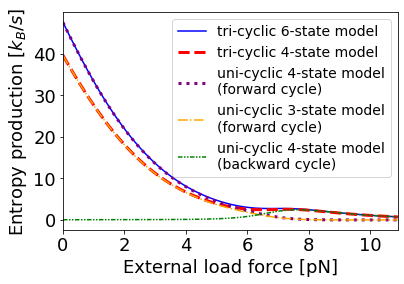

[0.039642227806101785, 2.4455297760681174]


In [8]:
newpath='Plots_force_mean_var/'
if not os.path.exists(newpath):
    os.makedirs(newpath)
f_size = 18
legend_size = 14

fig, ax = plt.subplots()

ax.plot(FORCE, A_P_mean, color='blue', label='tri-cyclic 6-state model')
ax.plot(FORCE, B_P_mean, linestyle='dashed', linewidth=3, color='red', label='tri-cyclic 4-state model')
ax.plot(FORCE, C_P_mean, linestyle='dotted', linewidth=3, color='purple', label='uni-cyclic 4-state model\n(forward cycle)')
ax.plot(FORCE, D_P_mean, linestyle='dashdot', color='orange', label='uni-cyclic 3-state model\n(forward cycle)')
ax.plot(FORCE, E_P_mean, linestyle=(0, (3, 1, 1, 1, 1, 1)), color='green', label='uni-cyclic 4-state model\n(backward cycle)')

ax.set_xlabel('External load force [pN]',fontsize=f_size)
ax.set_ylabel('Entropy production [$k_B/s$]',fontsize=f_size)
ax.tick_params(axis='both', labelsize=f_size)
locs, labels = plt.xticks()
plt.xticks(locs, [0,0,2,4,6,8,10, 10])
ax.set_xlim([np.min(FORCE),np.max(FORCE)])

ax.legend(prop={'size': legend_size})
#fig.tight_layout()
fig.savefig(newpath+'P_mean.eps', bbox_inches='tight')
plt.show()

print([np.min(E_P_mean), np.max(E_P_mean)])

[4.360000000000001e-12, 1.0900000000000001e-11]


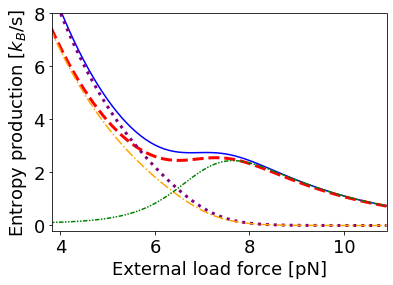

[0.039642227806101785, 2.4455297760681174]


In [9]:
fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=f_size)
ax.set_ylabel('Entropy production [$k_B$/s]',fontsize=f_size)

ax.plot(FORCE, A_P_mean, color='blue', label='tri-cyclic 6-state model')
ax.plot(FORCE, B_P_mean, linestyle='dashed', linewidth=3, color='red', label='tri-cyclic 4-state model')
ax.plot(FORCE, C_P_mean, linestyle='dotted', linewidth=3, color='purple', label='uni-cyclic 4-state model\n(forward cycle)')
ax.plot(FORCE, D_P_mean, linestyle='dashdot', color='orange', label='uni-cyclic 3-state model\n(forward cycle)')
ax.plot(FORCE, E_P_mean, linestyle=(0, (3, 1, 1, 1, 1, 1)), color='green', label='uni-cyclic 4-state model\n(backward cycle)')

ax.set_ylim([-0.2,8])
ax.set_xlim([0.4*np.max(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=f_size)
#ax.set_xlim([0.4*np.max(FORCE),np.max(FORCE)])
print([0.4*np.max(FORCE),np.max(FORCE)])
locs, labels = plt.xticks()
plt.xticks(locs, [4, 6, 8,  10, 12])
ax.set_xlim([0.35*np.max(FORCE),np.max(FORCE)])

fig.savefig(newpath+'P_mean_ausschnitt.eps',bbox_inches='tight')
plt.show()

print([np.min(E_P_mean), np.max(E_P_mean)])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


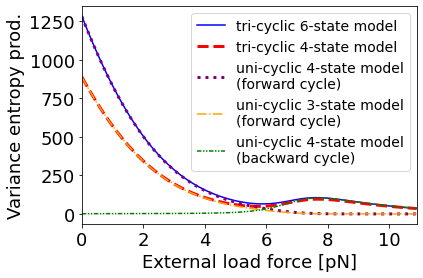

[1.3345180294633048, 103.56521581446545]


In [45]:
fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=f_size)
ax.set_ylabel('Variance entropy prod.',fontsize=f_size)

ax.plot(FORCE, A_P_var, color='blue', label='tri-cyclic 6-state model')
ax.plot(FORCE, B_P_var, linestyle='dashed', linewidth=3, color='red', label='tri-cyclic 4-state model')
ax.plot(FORCE, C_P_var, linestyle='dotted', linewidth=3, color='purple', label='uni-cyclic 4-state model\n(forward cycle)')
ax.plot(FORCE, D_P_var, linestyle='dashdot', color='orange', label='uni-cyclic 3-state model\n(forward cycle)')
ax.plot(FORCE, E_P_var, linestyle=(0, (3, 1, 1, 1, 1, 1)), color='green', label='uni-cyclic 4-state model\n(backward cycle)')

locs, labels = plt.xticks()
plt.xticks(locs, [0, 0,2,4,6,8,10,10])
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

ax.set_xlim([np.min(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=f_size)

ax.legend(prop={'size': legend_size})
#fig.tight_layout()
#fig.savefig('Plots_Force_Variance_New_Mapping/P_var.eps',bbox_inches='tight')
fig.savefig(newpath+'P_var.eps',bbox_inches='tight')
plt.show()

print([np.min(E_P_var), np.max(E_P_var)])

# Entropy relative difference

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


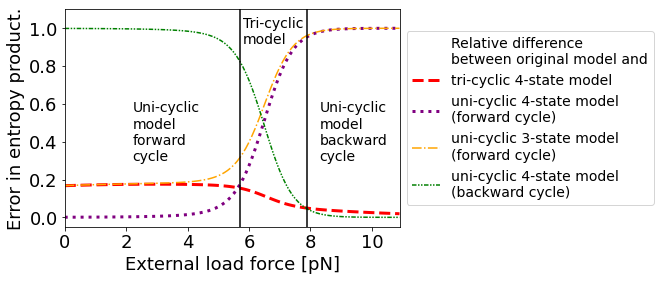

In [44]:
A_P_mean=np.array(A_P_mean)
B_P_mean=np.array(B_P_mean)
C_P_mean=np.array(C_P_mean)
D_P_mean=np.array(D_P_mean)

fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=f_size)
ax.set_ylabel('Error in entropy product.',fontsize=f_size)
ax.plot(0,0, color='white', label='Relative difference\nbetween original model and')
ax.plot(FORCE, (A_P_mean-B_P_mean)/A_P_mean, linestyle='dashed', linewidth=3, color='red', label='tri-cyclic 4-state model')
ax.plot(FORCE, (A_P_mean-C_P_mean)/A_P_mean, linestyle='dotted', linewidth=3, color='purple', label='uni-cyclic 4-state model\n(forward cycle)')
ax.plot(FORCE, (A_P_mean-D_P_mean)/A_P_mean, linestyle='dashdot', color='orange', label='uni-cyclic 3-state model\n(forward cycle)')
ax.plot(FORCE, (A_P_mean-E_P_mean)/A_P_mean, linestyle=(0, (3, 1, 1, 1, 1, 1)), color='green', label='uni-cyclic 4-state model\n(backward cycle)')
ax.set_ylim([-.05,1.1])

ax.plot([5.7e-12,5.7e-12],[-.05,1.1], color='black')
ax.plot([7.9e-12,7.9e-12],[-.05,1.1], color='black')

plt.text(2.2e-12, 0.3, 'Uni-cyclic\nmodel\nforward\ncycle', fontsize=legend_size )
plt.text(5.8e-12, .92, 'Tri-cyclic\nmodel', fontsize=legend_size )
plt.text(8.3e-12, 0.3, 'Uni-cyclic\nmodel\nbackward\ncycle', fontsize=legend_size )

locs, labels = plt.xticks()
plt.xticks(locs, [0, 0,2,4,6,8,10,10])
ax.set_xlim([np.min(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=f_size)

ax.legend(prop={'size': legend_size}, loc='center left', bbox_to_anchor=(1, 0.5))
#fig.tight_layout()
fig.savefig(newpath+'P_mean_relDiff_.eps', bbox_inches='tight')
plt.show()

In [16]:
tri_cyclic4state=(A_P_mean-B_P_mean)/A_P_mean
uni_cyclic4state=(A_P_mean-C_P_mean)/A_P_mean
backward_cycle=(A_P_mean-E_P_mean)/A_P_mean
count=0
for tri in tri_cyclic4state:
    if tri < uni_cyclic4state[count]:
        print('tri cyclic model better for ...')
        print(count)
        print('Force = '+str(FORCE[count]))
        print(tri_cyclic4state[count])
        print(uni_cyclic4state[count])
        break
    count=count+1
print()    
count=0
for tri in tri_cyclic4state:
    if tri > backward_cycle[count]:
        print('backward cyclic model better for ...')
        print(count)
        print('Force = '+str(FORCE[count]))
        print(tri_cyclic4state[count])
        print(backward_cycle[count])
        break
    count=count+1

tri cyclic model better for ...
57
Force = 5.7e-12
0.1545455792927239
0.1724624045642838

backward cyclic model better for ...
79
Force = 7.9e-12
0.048581732169055945
0.04427590385359906


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


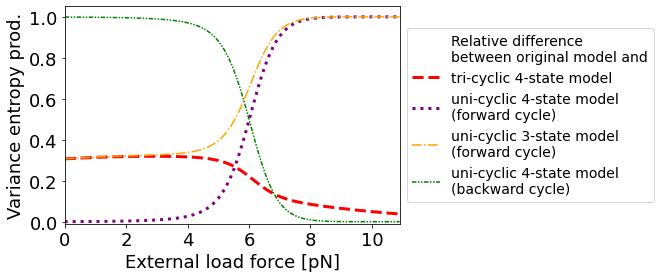

In [43]:
A_P_var=np.array(A_P_var)
B_P_var=np.array(B_P_var)
C_P_var=np.array(C_P_var)
D_P_var=np.array(D_P_var)

fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=f_size)
ax.set_ylabel('Variance entropy prod.',fontsize=f_size)
ax.plot(0,0, color='white', label='Relative difference\nbetween original model and')
ax.plot(FORCE, (A_P_var-B_P_var)/A_P_var, linestyle='dashed', linewidth=3, color='red', label='tri-cyclic 4-state model')
ax.plot(FORCE, (A_P_var-C_P_var)/A_P_var, linestyle='dotted', linewidth=3, color='purple',  label='uni-cyclic 4-state model\n(forward cycle)')
ax.plot(FORCE, (A_P_var-D_P_var)/A_P_var, linestyle='dashdot', color='orange', label='uni-cyclic 3-state model\n(forward cycle)')
ax.plot(FORCE, abs(A_P_var-E_P_var)/A_P_var, linestyle=(0, (3, 1, 1, 1, 1, 1)), color='green', label='uni-cyclic 4-state model\n(backward cycle)')
ax.set_ylim([-.01,1.051])

locs, labels = plt.xticks()
plt.xticks(locs, [0, 0,2,4,6,8,10,10])
ax.set_xlim([np.min(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=f_size)

#ax.plot([5.7e-12,5.7e-12],[-.05,1.1], color='black')
#ax.plot([7.8e-12,7.8e-12],[-.05,1.1], color='black')

#plt.text(2.2e-12, 0.3, 'Uni-cyclic\nmodel\nforward\ncycle', fontsize=14 )
#plt.text(5.8e-12, .95, 'Tri-cyclic\nmodel', fontsize=14 )
#plt.text(8.3e-12, 0.3, 'Uni-cyclic\nmodel\nbackward\ncycle', fontsize=14 )

ax.legend(prop={'size': legend_size}, loc='center left', bbox_to_anchor=(1, 0.5))
#fig.tight_layout()
#fig.savefig('Plots_Force_Variance_New_Mapping/relDiff_P_var.eps', bbox_inches='tight')
fig.savefig(newpath+'P_var_relDiff_.eps', bbox_inches='tight')
plt.show()

# Velocity

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


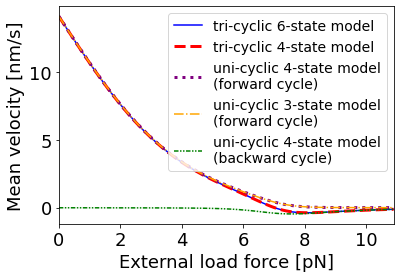

[-0.0580147002723681, -0.0011775833602356567]


In [42]:
fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=f_size)
ax.set_ylabel('Mean velocity [nm/s]',fontsize=f_size)
l = 8 # step size
ax.plot(FORCE, l * np.array(A_velo_mean), color='blue', label='tri-cyclic 6-state model')
ax.plot(FORCE, l * np.array(B_velo_mean), linestyle='dashed', linewidth=3, color='red', label='tri-cyclic 4-state model')
ax.plot(FORCE, l * np.array(C_velo_mean), linestyle='dotted', linewidth=3, color='purple',  label='uni-cyclic 4-state model\n(forward cycle)')
ax.plot(FORCE, l * np.array(D_velo_mean), linestyle='dashdot', color='orange',label='uni-cyclic 3-state model\n(forward cycle)')
ax.plot(FORCE, l * np.array(E_velo_mean), linestyle=(0, (3, 1, 1, 1, 1, 1)), color='green', label='uni-cyclic 4-state model\n(backward cycle)')

locs, labels = plt.xticks()
plt.xticks(locs, [0, 0,2,4,6,8,10,10])
ax.set_xlim([np.min(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=f_size)

ax.legend(prop={'size': legend_size})
#fig.tight_layout()
fig.savefig(newpath+'velocity_mean.eps', bbox_inches='tight')
plt.show()

print([np.min(E_velo_mean), np.max(E_velo_mean)])

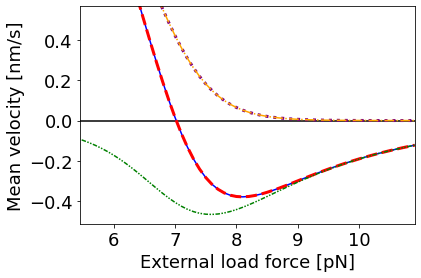

min and max of uni-cyclic velocity
[7.966545246915202e-06, 1.7662358769369022]
[7.96654524692908e-06, 1.7662358769369024]
[-0.0580147002723681, -0.0011775833602356567]


In [41]:
fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=f_size)
ax.set_ylabel('Mean velocity [nm/s]',fontsize=f_size)
ax.plot([np.min(FORCE),np.max(FORCE)],[0,0], color='black')
ax.plot(FORCE, l * np.array(A_velo_mean), color='blue', label='tri-cyclic 6-state model')
ax.plot(FORCE, l * np.array(B_velo_mean), linestyle='dashed', linewidth=3, color='red', label='tri-cyclic 4-state model')
ax.plot(FORCE, l * np.array(C_velo_mean), linestyle='dotted', linewidth=3, color='purple',  label='uni-cyclic 4-state model\n(forward cycle)')
ax.plot(FORCE, l * np.array(D_velo_mean), linestyle='dashdot', color='orange',label='uni-cyclic 3-state model\n(forward cycle)')
ax.plot(FORCE, l * np.array(E_velo_mean), linestyle=(0, (3, 1, 1, 1, 1, 1)), color='green', label='uni-cyclic 4-state model\n(backward cycle)')


ax.set_ylim([l*1.1*np.min(E_velo_mean),l*0.04*np.max(A_velo_mean)])
#ax.ticklabel_format(axis='y',style='sci', scilimits=(0,2) )

ax.set_xlim([0.5*np.max(FORCE),np.max(FORCE)])
locs, labels = plt.xticks()
plt.xticks(locs, [5, 6, 7, 8, 9, 10,10])
ax.set_xlim([0.5*np.max(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=f_size)

#fig.tight_layout()
fig.savefig(newpath+'velocity_mean_zoomed_in.eps', bbox_inches='tight')
plt.show()

print('min and max of uni-cyclic velocity')
print([np.min(C_velo_mean), np.max(C_velo_mean)])
print([np.min(D_velo_mean), np.max(D_velo_mean)])
print([np.min(E_velo_mean), np.max(E_velo_mean)])

In [21]:
print('Comparison of velocity for 10pN')
print([A_velo_mean[-1], B_velo_mean[-1], C_velo_mean[-1], D_velo_mean[-1]])

Comparison of velocity for 10pN
[-0.015248595989040215, -0.015248595989040228, 7.966545246915202e-06, 7.96654524692908e-06]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


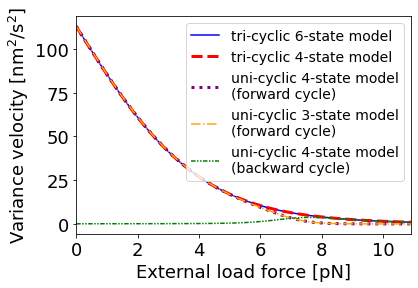

[0.0011775833602359709, 0.05801470027236816]


In [40]:
fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=f_size)
ax.set_ylabel('Variance velocity [nm$^2$/s$^2$]',fontsize=f_size)
ax.plot(FORCE, l*l*np.array(A_velo_var), color='blue', label='tri-cyclic 6-state model')
ax.plot(FORCE, l*l*np.array(B_velo_var), linestyle='dashed', linewidth=3, color='red', label='tri-cyclic 4-state model')
ax.plot(FORCE, l*l*np.array(C_velo_var), linestyle='dotted', linewidth=3, color='purple',  label='uni-cyclic 4-state model\n(forward cycle)')
ax.plot(FORCE, l*l*np.array(D_velo_var), linestyle='dashdot', color='orange',label='uni-cyclic 3-state model\n(forward cycle)')
ax.plot(FORCE, l*l*np.array(E_velo_var), linestyle=(0, (3, 1, 1, 1, 1, 1)), color='green', label='uni-cyclic 4-state model\n(backward cycle)')

locs, labels = plt.xticks()
plt.xticks(locs, [0, 0,2,4,6,8,10,10])
ax.set_xlim([np.min(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=f_size)

ax.legend(prop={'size': legend_size})
#fig.tight_layout()
fig.savefig(newpath+'velocity_variance.eps', bbox_inches='tight')
plt.show()

print([np.min(E_velo_var), np.max(E_velo_var)])

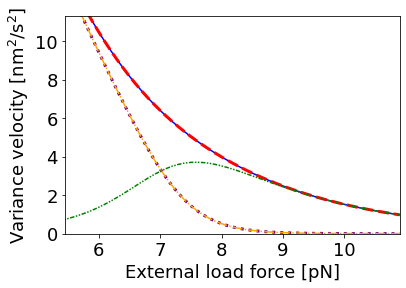

In [39]:
fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=f_size)
ax.set_ylabel('Variance velocity [nm$^2$/s$^2$]',fontsize=f_size)
ax.plot(FORCE, l*l*np.array(A_velo_var), color='blue', label='tri-cyclic 6-state model')
ax.plot(FORCE, l*l*np.array(B_velo_var), linestyle='dashed', linewidth=3, color='red', label='tri-cyclic 4-state model')
ax.plot(FORCE, l*l*np.array(C_velo_var), linestyle='dotted', linewidth=3, color='purple',  label='uni-cyclic 4-state model\n(forward cycle)')
ax.plot(FORCE, l*l*np.array(D_velo_var), linestyle='dashdot', color='orange',label='uni-cyclic 3-state model\n(forward cycle)')
ax.plot(FORCE, l*l*np.array(E_velo_var), linestyle=(0, (3, 1, 1, 1, 1, 1)), color='green', label='uni-cyclic 4-state model\n(backward cycle)')

ax.set_ylim([-1e-2,0.1*l*l*np.max(A_velo_var)])

ax.ticklabel_format(axis='y',style='sci', scilimits=(0,2) )

ax.set_xlim([0.5*np.max(FORCE),np.max(FORCE)])
locs, labels = plt.xticks()
plt.xticks(locs, [6, 6, 7, 8, 9, 10, 10])
ax.set_xlim([0.5*np.max(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=f_size)

#fig.tight_layout()
fig.savefig(newpath+'velocity_variance_zoomed_in.eps', bbox_inches='tight')
plt.show()


In [26]:
print('Comparison of variance of velocity for 10pN')
print([A_velo_var[-1], B_velo_var[-1], C_velo_var[-1], D_velo_var[-1]])

Comparison of variance of velocity for 10pN
[0.015261589726064324, 0.015261595232792073, 8.042820520515046e-06, 8.049605267551735e-06]


# Velocity relative difference

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


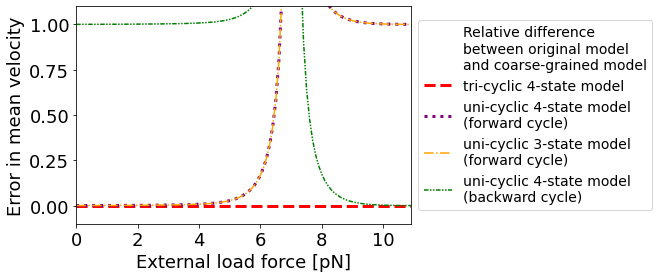

In [38]:
A_velo_mean=np.array(A_velo_mean)
B_velo_mean=np.array(B_velo_mean)
C_velo_mean=np.array(C_velo_mean)
D_velo_mean=np.array(D_velo_mean)

fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=f_size)
ax.set_ylabel('Error in mean velocity',fontsize=f_size)
ax.plot(0,0, color='white', label='Relative difference\nbetween original model\nand coarse-grained model')
ax.plot(FORCE, (A_velo_mean-B_velo_mean)/A_velo_mean, linestyle='dashed', linewidth=3, color='red', label='tri-cyclic 4-state model')
ax.plot(FORCE, abs((A_velo_mean-C_velo_mean)/A_velo_mean), linestyle='dotted', linewidth=3, color='purple',  label='uni-cyclic 4-state model\n(forward cycle)')
ax.plot(FORCE, abs((A_velo_mean-D_velo_mean)/A_velo_mean), linestyle='dashdot', color='orange', label='uni-cyclic 3-state model\n(forward cycle)')
ax.plot(FORCE, abs((A_velo_mean-E_velo_mean)/A_velo_mean), linestyle=(0, (3, 1, 1, 1, 1, 1)), color='green', label='uni-cyclic 4-state model\n(backward cycle)')

ax.set_ylim([-.1,1.1])

#ax.plot([3e-12,3e-12],[-.1,1.1], color='black')
#ax.plot([7.1e-12,7.1e-12],[-.1,1.1], color='black')
#plt.text(0.4e-12, 0.3, 'Uni-cyclic\nmodel\nforward\ncycle', fontsize=14 )
#plt.text(3.5e-12, 0.4, 'Tri-cyclic\nmodel', fontsize=14 )
#plt.text(8.3e-12, 0.3, 'Uni-cyclic\nmodel\nbackward\ncycle', fontsize=14 )

locs, labels = plt.xticks()
plt.xticks(locs, [0, 0,2,4,6,8,10,10])
ax.set_xlim([np.min(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=f_size)

ax.legend(prop={'size': legend_size}, loc='center left', bbox_to_anchor=(1, 0.5))
#fig.tight_layout()
fig.savefig(newpath+'velocity_relDiff.eps', bbox_inches='tight')
plt.show()

In [29]:
tri_cyclic4state=abs((A_velo_mean-B_velo_mean)/A_velo_mean)
uni_cyclic4state=abs((A_velo_mean-D_velo_mean)/A_velo_mean)
backward_cycle=abs((A_velo_mean-E_velo_mean)/A_velo_mean)
count=0
for tri in tri_cyclic4state:
    if tri < uni_cyclic4state[count]:
        print('tri cyclic model better for ...')
        print(count)
        print('Force = '+str(FORCE[count]))
        print(tri_cyclic4state[count])
        print(uni_cyclic4state[count])
        break
    count=count+1
print()    
count=0
for tri in tri_cyclic4state:
    if tri > backward_cycle[count]:
        print('backward cyclic model better for ...')
        print(count)
        print('Force = '+str(FORCE[count]))
        print(tri_cyclic4state[count])
        print(backward_cycle[count])
        break
    count=count+1

tri cyclic model better for ...
0
Force = 0.0
3.774004616160628e-16
0.0006671640050199702



In [30]:
print('min and max value of velocity in velocity')
A_min, A_max = [np.min(A_velo_mean), np.max(A_velo_mean)]
C_min, C_max = [np.min(C_velo_mean), np.max(C_velo_mean)]
print([np.min(A_velo_mean), np.max(A_velo_mean)])
print([np.min(C_velo_mean), np.max(C_velo_mean)])
print((A_min-C_min)/A_min)
print([np.min(C_velo_mean-A_velo_mean), np.max(C_velo_mean-A_velo_mean)])
diff=C_velo_mean-A_velo_mean
index=np.where(diff==np.max(diff))
print(diff[index])

print()
print('Finde divergierende Stelle')
relDiff=(A_velo_mean-C_velo_mean)/A_velo_mean
[rel_min, rel_max]= [np.min(relDiff), np.max(relDiff)]
print([rel_min, rel_max])
index_min=np.where(relDiff==rel_min)
index_max=np.where(relDiff==rel_max)
print([index_min, index_max])
print('Kräfte, bei denen es divergiert')
print(FORCE[index_min])
print(FORCE[index_max])

min and max value of velocity in velocity
[-0.04716140860007556, 1.765058293576666]
[7.966545246915202e-06, 1.7662358769369022]
1.0001689208504028
[0.0011775833602361008, 0.058014700272368325]
[0.0580147]

Finde divergierende Stelle
[-26.15306296197353, 6.888825680729652]
[(array([70]),), (array([71]),)]
Kräfte, bei denen es divergiert
[7.e-12]
[7.1e-12]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


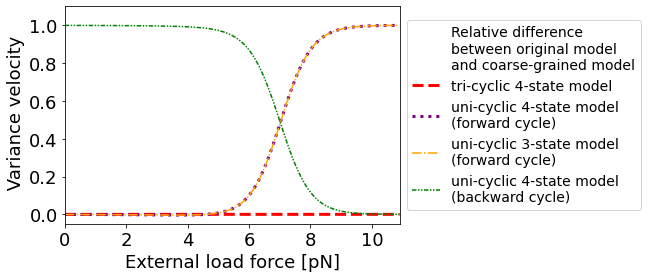

In [37]:
A_velo_var=np.array(A_velo_var)
B_velo_var=np.array(B_velo_var)
C_velo_var=np.array(C_velo_var)
D_velo_var=np.array(D_velo_var)

fig, ax = plt.subplots()
ax.set_xlabel('External load force [pN]',fontsize=f_size)
ax.set_ylabel(' Variance velocity',fontsize=f_size)
ax.plot(0,0, color='white', label='Relative difference\nbetween original model\nand coarse-grained model')
#ax.scatter(FORCE, (A_velo_var-A_velo_var), marker='.', label='tri-cyclic 6-state model')
ax.plot(FORCE, (A_velo_var-B_velo_var)/A_velo_var, linestyle='dashed', linewidth=3,  color='red', label='tri-cyclic 4-state model')
ax.plot(FORCE, (A_velo_var-C_velo_var)/A_velo_var, linestyle='dotted', linewidth=3, color='purple',  label='uni-cyclic 4-state model\n(forward cycle)')
ax.plot(FORCE, (A_velo_var-D_velo_var)/A_velo_var, linestyle='dashdot', color='orange', label='uni-cyclic 3-state model\n(forward cycle)')
ax.plot(FORCE, (A_velo_var-E_velo_var)/A_velo_var, linestyle=(0, (3, 1, 1, 1, 1, 1)), color='green', label='uni-cyclic 4-state model\n(backward cycle)')

ax.set_ylim([-.05,1.1])

#ax.plot([2.57e-12,2.57e-12],[-.05,1.1], color='black')
#plt.text(0.2e-12, 0.3, 'Uni-cyclic\nmodel\nforward\ncycle', fontsize=14 )
#plt.text(3.5e-12, 0.4, 'Tri-cyclic\nmodel', fontsize=14 )

locs, labels = plt.xticks()
plt.xticks(locs, [0, 0,2,4,6,8,10, 10])
ax.set_xlim([np.min(FORCE),np.max(FORCE)])
ax.tick_params(axis='both', labelsize=f_size)

ax.legend(prop={'size': legend_size}, loc='center left', bbox_to_anchor=(1, 0.5))
#fig.tight_layout()
fig.savefig(newpath+'velocity_variance_relDiff.eps', bbox_inches='tight')
plt.show()